In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
pdims=(4 , 2)
#for single gpu
# pdims = (1 , 1)

In [65]:
folder = '.'

init_field_slices = []
field_slices = []
nb_solutions = 4
nb_to_plot = 4
final_slices = []

for _ in range(nb_solutions):
    final_slices.append([])

for i in range(pdims[0]):
    row_init_field = []
    row_field = []
    row_final_field = []
    for _ in range(nb_solutions):
        row_final_field.append([])
    
    for j in range(pdims[1]):
        slice_index = i * pdims[1]  + j 
        row_field.append(np.load(f'{folder}/field_{slice_index}.npy'))
        row_init_field.append(np.load(f'{folder}/initial_conditions_{slice_index}.npy'))

        for sol_indx in range((nb_solutions - nb_to_plot) , nb_solutions):
            row_final_field[sol_indx].append(np.load(f'{folder}/final_field_{sol_indx}_{slice_index}.npy'))
    

    field_slices.append(np.vstack(row_field))
    init_field_slices.append(np.vstack(row_init_field))

    for sol_indx in range((nb_solutions - nb_to_plot) , nb_solutions):
        final_slices[sol_indx].append(np.vstack(row_final_field[sol_indx]))


field = np.hstack(field_slices)
initial_conditions = np.hstack(init_field_slices)
final_fields = []

for sol_indx in range(nb_solutions - nb_to_plot , nb_solutions):
    final_fields.append(np.hstack(final_slices[sol_indx]))

field.shape

(256, 256, 256)

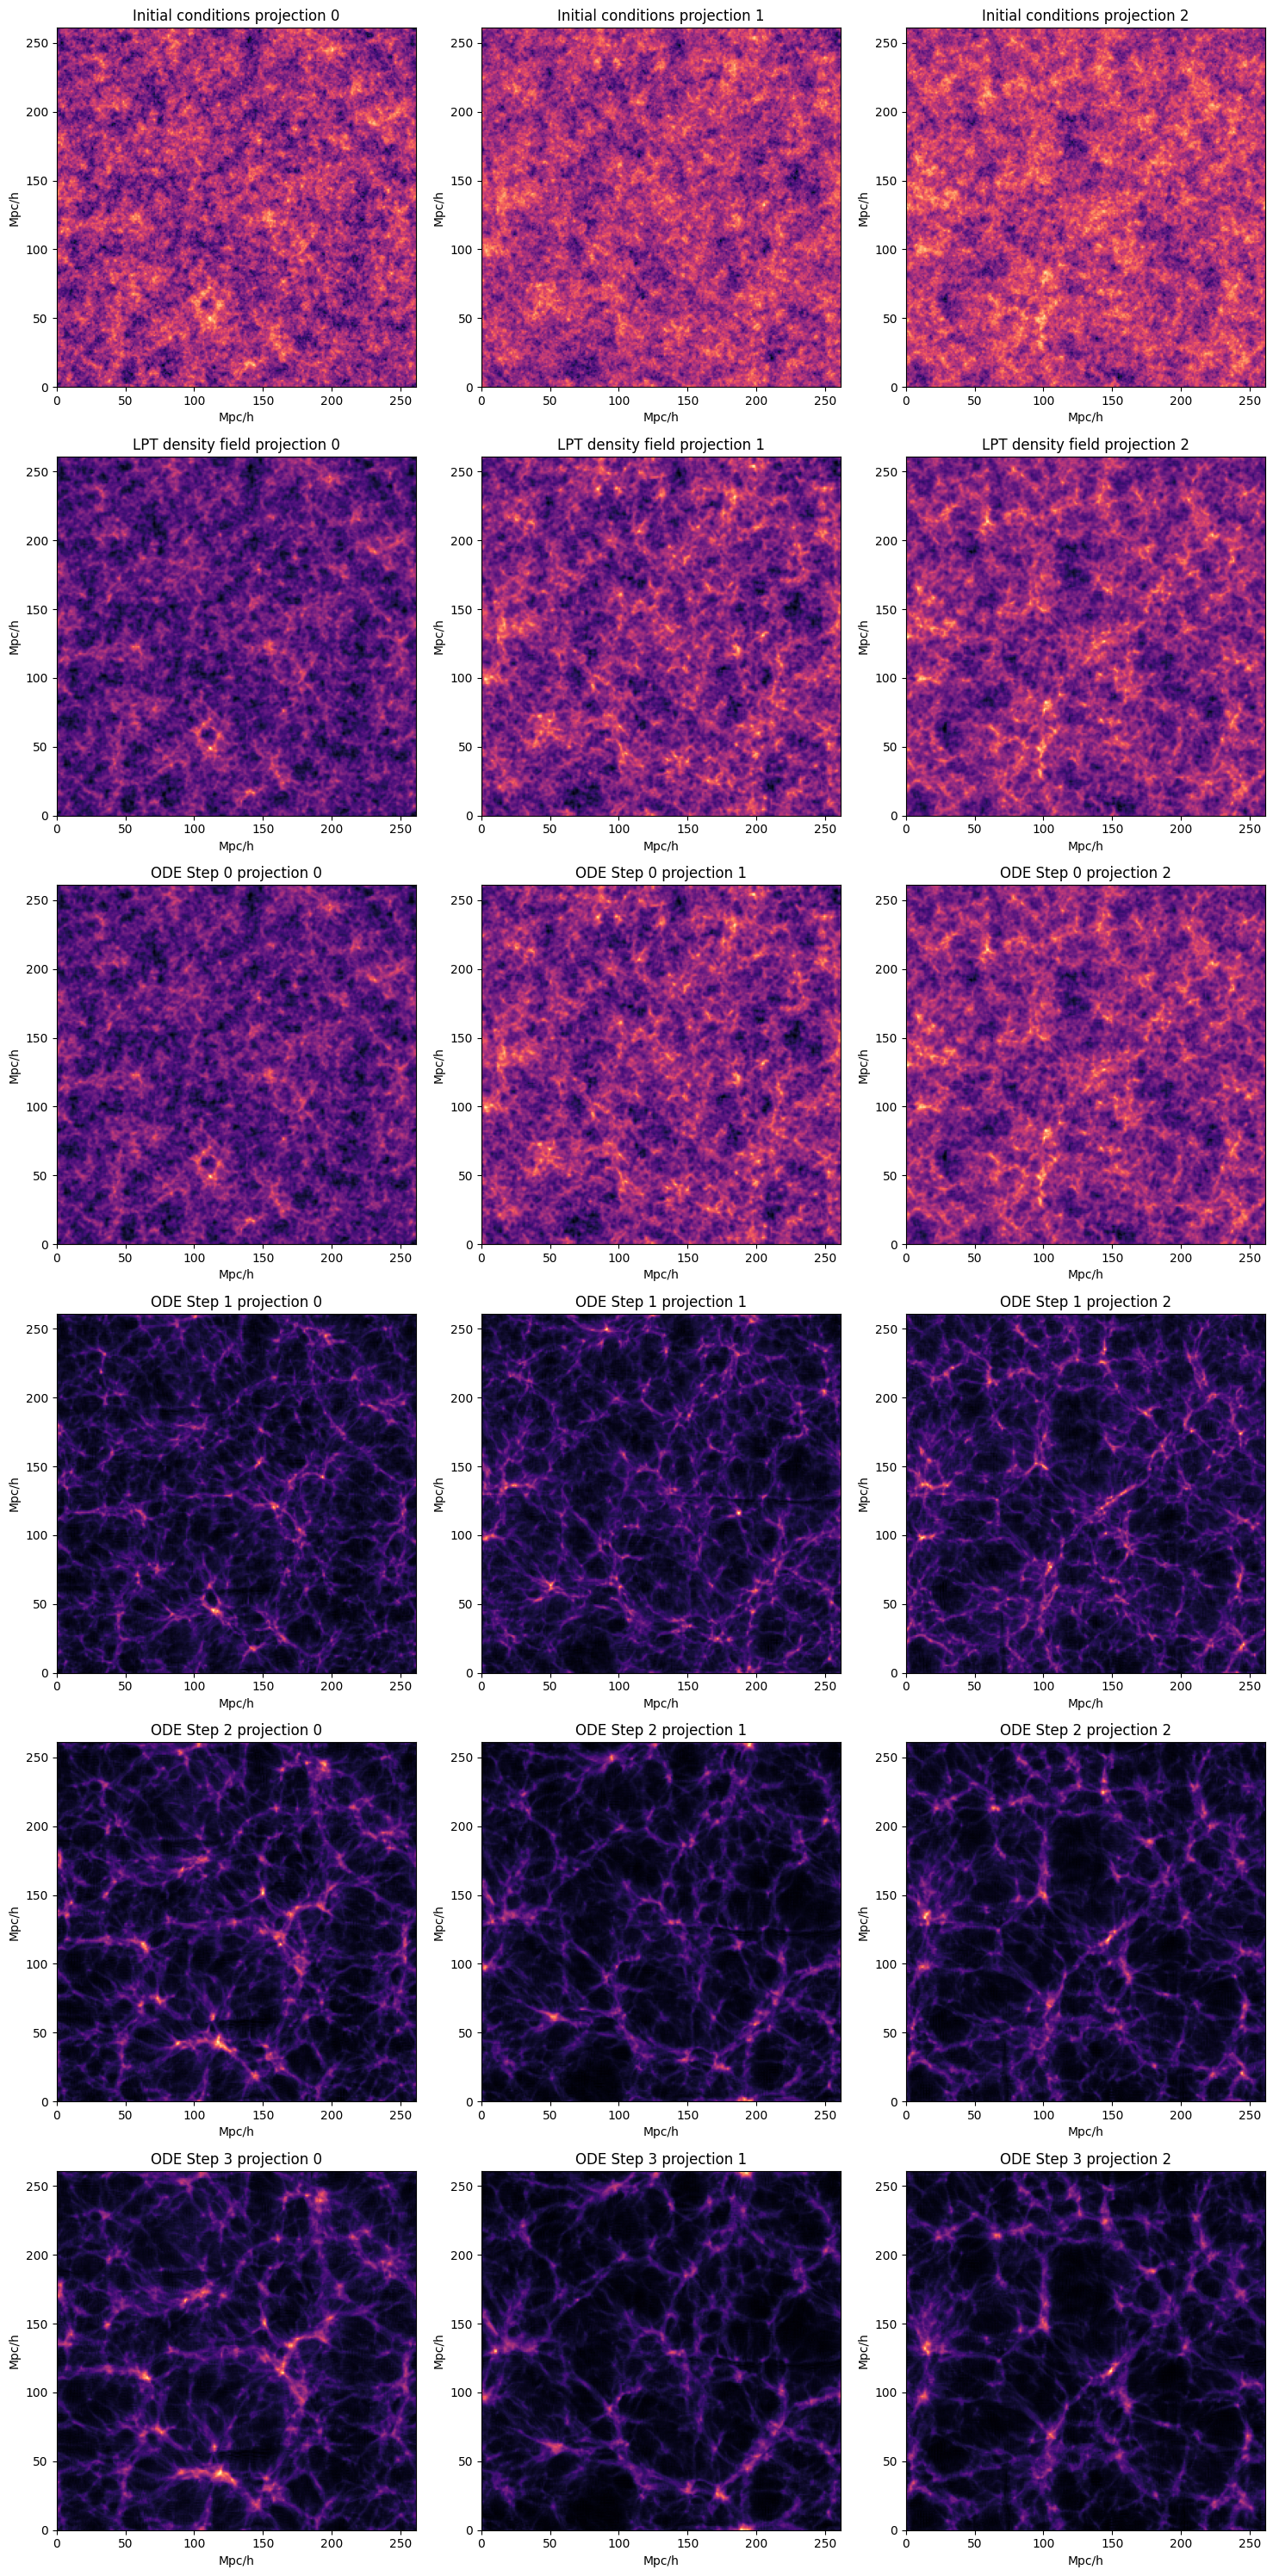

In [66]:
box_size = field.shape[0]
sum_over = field.shape[0] // 8

# Function to create subplots
def plot_subplots(proj_axis, input , row, axes, title):
    slicing = [slice(None)] * input.ndim
    slicing[proj_axis] = slice(None, sum_over)
    slicing = tuple(slicing)

    # Plot initial conditions
    axes[row, proj_axis].imshow(input[slicing].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
    axes[row, proj_axis].set_xlabel('Mpc/h')
    axes[row, proj_axis].set_ylabel('Mpc/h')
    axes[row, proj_axis].set_title(title)

# Initialize figure and axes
nb_rows = 2 + len(final_fields)
nb_cols = 3
fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(15, 5 * nb_rows))

# Plot initial conditions and LPT field for each projection
for proj_axis in range(3):
    plot_subplots(proj_axis,initial_conditions ,  0, axes, f'Initial conditions projection {proj_axis}')
    plot_subplots(proj_axis, field ,  1, axes, f'LPT density field projection {proj_axis}')

# Plot final fields for each projection
for indx, final_field in enumerate(final_fields):
    for proj_axis in range(3):
        slicing = [slice(None)] * final_field.ndim
        slicing[proj_axis] = slice(None, sum_over)
        slicing = tuple(slicing)
        axes[indx + 2, proj_axis].imshow(final_fields[indx][slicing].sum(axis=proj_axis) + 1, cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
        axes[indx + 2, proj_axis].set_xlabel('Mpc/h')
        axes[indx + 2, proj_axis].set_ylabel('Mpc/h')
        axes[indx + 2, proj_axis].set_title(f'ODE Step {indx} projection {proj_axis}')

plt.tight_layout()
plt.show()

In [ ]:
folder = '.'
pdims=(2,2)

field_slices = []


for i in range(pdims[0]):
    row_field = []
    
    for j in range(pdims[1]):
        slice_index = i * pdims[1]  + j 
        row_field.append(np.load(f'{folder}/final_state_{slice_index}.npy'))
    

    field_slices.append(np.vstack(row_field))

field = np.hstack(field_slices)

field.shape

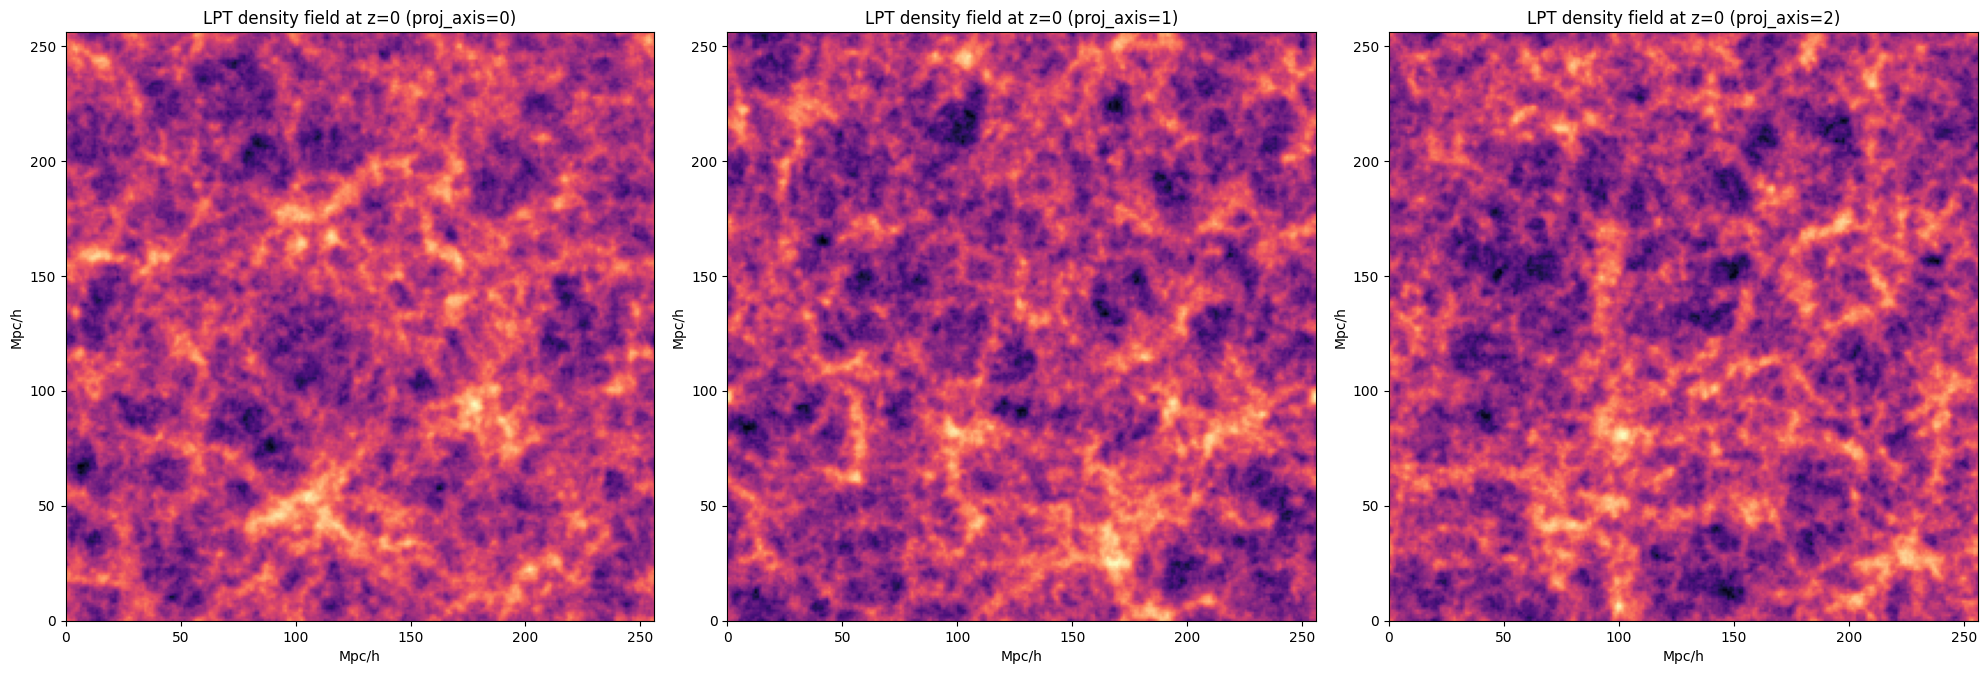

In [50]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
sum_over = field.shape[0] 
box_size = field.shape[0]

# Loop over projection axes 0 to 2
for proj_axis in range(3):
    slicing = [slice(None)] * field.ndim
    slicing[proj_axis] = slice(None, sum_over)
    slicing = tuple(slicing)

    # Generate the plot for the current projection axis
    axes[proj_axis].imshow(np.log10(field[slicing].sum(axis=proj_axis) + 1), cmap='magma', extent=[0, box_size, 0, box_size])
    axes[proj_axis].set_xlabel('Mpc/h')
    axes[proj_axis].set_ylabel('Mpc/h')
    axes[proj_axis].set_title(f'LPT density field at z=0 (proj_axis={proj_axis})')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [13]:
# Projection axis and box size
proj_axis = 2
box_size = initial_conditions.shape[0] + 5
plt.figure(figsize=(20, 20))
# Generate the plot
plt.imshow(np.log10(final_fields[-1].sum(axis=proj_axis) + 1), cmap='magma', extent=[0, box_size, 0, box_size])
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('LPT density field at z=0')

# Display the plot
plt.show()

IndexError: list index out of range

<Figure size 2000x2000 with 0 Axes>